**Problem Statment:
Fit MLR model and interpret the modeling results**


**Importing pandas and matplotlib**


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

**Displaying top 5 rows of Dataset**

In [22]:
df = pd.read_csv("/content/Tranport_Dataset.csv")
df.head()


,No. of trips per household per day*,No. of working members,No. of student members,No. of motorized vehicle owned,Income (in thousands)
0,4,1,3,1,40
1,4,2,1,4,50
2,4,1,2,2,70
3,4,1,2,2,55
4,2,1,0,3,40


**Adding last two digits of roll number into Trips column and displaying top 5 rows of data set**

In [23]:
Roll_No = 60
df['No. of trips per household per day*'] = df['No. of trips per household per day*'] + Roll_No
df.head()

,No. of trips per household per day*,No. of working members,No. of student members,No. of motorized vehicle owned,Income (in thousands)
0,64,1,3,1,40
1,64,2,1,4,50
2,64,1,2,2,70
3,64,1,2,2,55
4,62,1,0,3,40


**Ploting independent variables VS dependent variable to check trend in dataset**

Performing simple linear regression using stats tool to check trend and as a result we see model performs poorly with low value of r-squared and adj r-squared

Independent variable: "No. of working members"
slope:  0.7498
intercept:  62.4473
R2:  0.2676
Adj_R-squared 0.2664


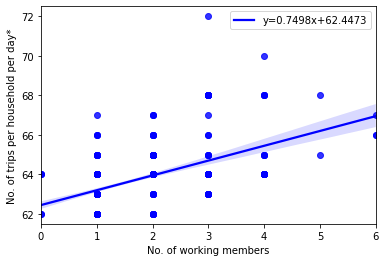

In [32]:
x1 = df['No. of working members']
y = df['No. of trips per household per day*']
X = sm.add_constant(x1)
slr1 = sm.OLS(y,X)
result1 = slr1.fit()
intercept = result1.params[0]
slope = result1.params[1]
print('Independent variable: "No. of working members"')
print('slope: ',round(slope,4))
print('intercept: ',round(intercept,4))
print('R2: ', round(result1.rsquared,4))
print('Adj_R-squared',round(result1.rsquared_adj,4))
plot1 = sns.regplot(x='No. of working members', y='No. of trips per household per day*', data= df , color='b', 
line_kws = {'label':"y={0:.4f}x+{1:.4f}".format(slope,intercept)})
plot1.legend()
plt.show()


Independent variable: "No. of student members"
slope:  0.6717
intercept:  62.8675
R2:  0.3076
Adj_R-squared 0.3065


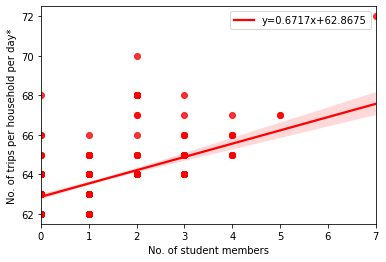

In [37]:
x2 = df['No. of student members']
y = df['No. of trips per household per day*']
X = sm.add_constant(x2)
slr1 = sm.OLS(y,X)
result1 = slr1.fit()
intercept = result1.params[0]
slope = result1.params[1]
print('Independent variable: "No. of student members"')
print('slope: ',round(slope,4))
print('intercept: ',round(intercept,4))
print('R2: ', round(result1.rsquared,4))
print('Adj_R-squared',round(result1.rsquared_adj,4))
plot1 = sns.regplot(x= 'No. of student members', y='No. of trips per household per day*', data= df , color='r', 
line_kws = {'label':"y={0:.4f}x+{1:.4f}".format(slope,intercept)})
plot1.legend()
plt.show()

Independent variable: "No. of motorized vehicle owned"
slope:  0.1858
intercept:  63.3284
R2:  0.0493
Adj_R-squared 0.0478


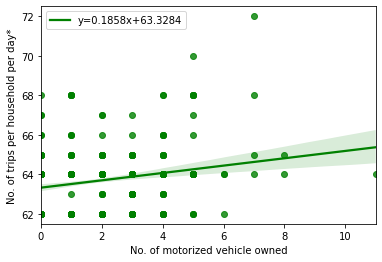

In [38]:
x3 = df['No. of motorized vehicle owned']
y = df['No. of trips per household per day*']
X = sm.add_constant(x3)
slr1 = sm.OLS(y,X)
result1 = slr1.fit()
intercept = result1.params[0]
slope = result1.params[1]
print('Independent variable: "No. of motorized vehicle owned"')
print('slope: ',round(slope,4))
print('intercept: ',round(intercept,4))
print('R2: ', round(result1.rsquared,4))
print('Adj_R-squared',round(result1.rsquared_adj,4))
plot1 = sns.regplot(x = 'No. of motorized vehicle owned', y='No. of trips per household per day*', data= df , color='g', 
line_kws = {'label':"y={0:.4f}x+{1:.4f}".format(slope,intercept)})
plot1.legend()
plt.show()

Independent variable: "Income (in thousands)"
slope:  0.0086
intercept:  63.4105
R2:  0.0286
Adj_R-squared 0.0271


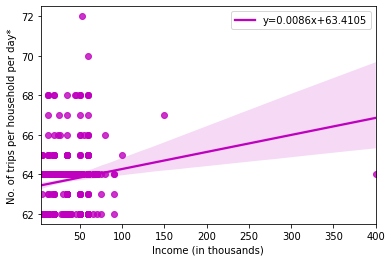

In [41]:
x4 = df['Income (in thousands)']
y = df['No. of trips per household per day*']
X = sm.add_constant(x4)
slr1 = sm.OLS(y,X)
result1 = slr1.fit()
intercept = result1.params[0]
slope = result1.params[1]
print('Independent variable: "Income (in thousands)"')
print('slope: ',round(slope,4))
print('intercept: ',round(intercept,4))
print('R2: ', round(result1.rsquared,4))
print('Adj_R-squared',round(result1.rsquared_adj,4))
plot1 = sns.regplot(x = 'Income (in thousands)', y='No. of trips per household per day*', data= df , color='m', 
line_kws = {'label':"y={0:.4f}x+{1:.4f}".format(slope,intercept)})
plot1.legend()
plt.show()

**Checking correlation between variables**

**Correlation coefficient** :- It is used to measure how strong a relationship is between two variables.
Pearson’s correlation (also called Pearson’s R) is a correlation coefficient commonly used in linear
regression. A correlation coefficient of 1 means that for every positive increase in one variable,
there is a positive increase of a fixed proportion in the other. A correlation coefficient of -1 means
that for every positive increase in one variable, there is a negative decrease of a fixed proportion in
the other. Zero means that for every increase, there isn’t a positive or negative increase. The two
just aren’t related.

The R is calculated as :- 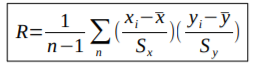

Using heatmap we can find how much variables are correlated to each other.

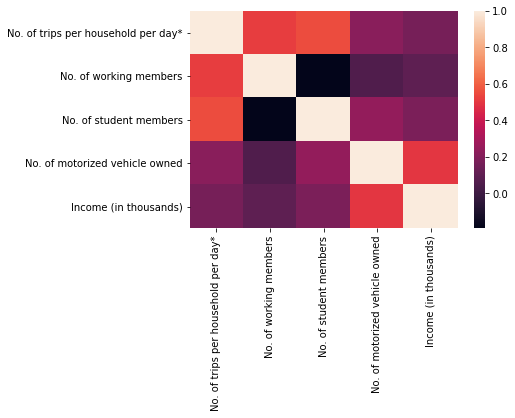

In [42]:
import seaborn as sns
sns.heatmap(df.corr())

From the graph we can clearly see that No. of working members and No. of student members are showing some correlation with target variable


**Spliting the dataset into x-set as independent variables and y-set as Dependent Varible**

The best model came out to be the last one, with all the 4 independent variables. 



In [58]:
lst = ['No. of working members'	,'No. of student members'	,'No. of motorized vehicle owned','Income (in thousands)']
from itertools import combinations
for i in range(2,5):
  for comb in combinations(lst,i):
    x = df[list(comb)].values
    y = df['No. of trips per household per day*']
    X = sm.add_constant(x)
    mlr = sm.OLS(y,X)
    result = mlr.fit()
    print('Independent variables: ',comb,)
    print('paramters: ',result.params)    
    print('R2: ', round(result.rsquared,4))
    print('Adj_R-squared',round(result.rsquared_adj,4),end = '\n\n')
    print("="*100,end = '\n\n')


  


Independent variables:  ('No. of working members', 'No. of student members')
paramters:  const    61.150114
x1        0.937641
x2        0.821420
dtype: float64
R2:  0.7108
Adj_R-squared 0.7099


Independent variables:  ('No. of working members', 'No. of motorized vehicle owned')
paramters:  const    62.169617
x1        0.734063
x2        0.162029
dtype: float64
R2:  0.3049
Adj_R-squared 0.3027


Independent variables:  ('No. of working members', 'Income (in thousands)')
paramters:  const    62.290841
x1        0.732410
x2        0.005995
dtype: float64
R2:  0.2813
Adj_R-squared 0.279


Independent variables:  ('No. of student members', 'No. of motorized vehicle owned')
paramters:  const    62.759912
x1        0.644780
x2        0.074759
dtype: float64
R2:  0.3151
Adj_R-squared 0.313


Independent variables:  ('No. of student members', 'Income (in thousands)')
paramters:  const    62.777134
x1        0.656252
x2        0.003532
dtype: float64
R2:  0.3122
Adj_R-squared 0.3101


Independ

**Getting Output Report using statsmodels for Regression**

In [59]:
x = df[['No. of working members'	,'No. of student members'	,'No. of motorized vehicle owned','Income (in thousands)']]
y = df['No. of trips per household per day*']
X = sm.add_constant(x)
output = sm.OLS(y,X).fit().summary()
print(output)

                                     OLS Regression Results                                    
Dep. Variable:     No. of trips per household per day*   R-squared:                       0.712
Model:                                             OLS   Adj. R-squared:                  0.710
Method:                                  Least Squares   F-statistic:                     396.7
Date:                                 Sun, 04 Oct 2020   Prob (F-statistic):          9.38e-172
Time:                                         05:03:16   Log-Likelihood:                -677.08
No. Observations:                                  646   AIC:                             1364.
Df Residuals:                                      641   BIC:                             1387.
Df Model:                                            4                                         
Covariance Type:                             nonrobust                                         
                                     coe